In [1]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import linalg
from sklearn import neighbors 
from sklearn import metrics

#Set plots to inline
%matplotlib inline

#Define plot colors and options
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

#Define classifier decision boundary plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [0,1,2]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i]);
    plt.xlabel('Feature 1');
    plt.ylabel('Feature 2');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.colorbar();
    plt.axis('tight');
    plt.title(title);


In [2]:
#Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X    = iris['data']
Y    = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

Training Error Rate is: 0.1667


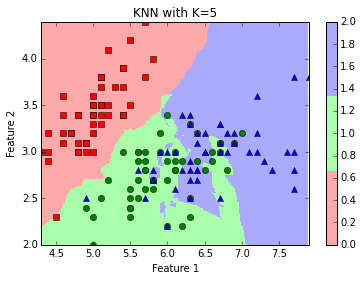

In [3]:
#Select K
K=5

#Select distance metric
metric='euclidean'

#Select first two features
X2 = X[:,[0,1]]

#Fit the classifier
clf = neighbors.KNeighborsClassifier(K,metric=metric)
clf.fit(X2, Y)

#Plot the classification function
plot_classifier(X2,Y,clf,"KNN with K=%d"%(K,))

#Make predictions using model
Yhat = clf.predict(X2)

#Report the error rate
Err  = 1-metrics.accuracy_score(Yhat,Y)
print("Training Error Rate is: %.4f"%(Err,))
